In [1]:
from d2l import torch as d2l
from matplotlib_inline import backend_inline
import numpy as np
%matplotlib inline

In [6]:
def f(x):
    return 3*x**2-4*x

def numerical_lim(x,h):
    return (f(x+h)-f(x))/h

print(numerical_lim(1,0.2))
h=0.1
for i in range(5):
    print(f"h={h:.5f},numerical limit={numerical_lim(1,h):.5f}")
    h*=0.1

2.6000000000000023
h=0.10000,numerical limit=2.30000
h=0.01000,numerical limit=2.03000
h=0.00100,numerical limit=2.00300
h=0.00010,numerical limit=2.00030
h=0.00001,numerical limit=2.00003


In [10]:
def use_svg_display():#@save
    backend_inline.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5,2.5)):#@save
    '''
    设置matplotlib的图表大小
    '''
    use_svg_display()
    d2l.plt.rcParams['figure.figsize']=figsize
#@save
def set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()
#save
def plot(X,Y=None,xlabel=None,ylabel=None,legend=None,xlim=None,ylim=None,xscale='linear',yscale='linear',fmts=('-','m--','g-.','r:'),figsize=(3.5,2.5),axes=None):
    if legend is None:
        legend=[]
    set_figsize(figsize)
    axes=axes if axes else d2l.plt.gca()

    def has_one_axis(X):
        return (hasattr(X,"ndim") and X.ndim==1 or isinstance(X,list) and not hasattr(X[0],"__len__"))
        if has_one_axis(X):
            X=[X]
        if Y is None:
            X,Y=[[]]*len(X),X
        elif has_one_axis(Y):
            Y=[Y]
        if len(X)!=len(Y):
            X=X*len(Y)
        axes.cla()
        for x,y,fmt in zip(X,Y,fmts):
            if len(x):
                axes.plot(x,y,fmts)
            else:
                axes.plot(y,fmt)
        set_axes(axes,xlabel,ylabel,xlim,ylim,scale,yscale,legend)


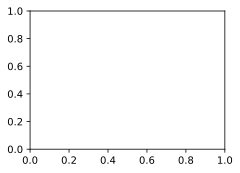

In [11]:
x=np.arange(0,3,0.1)
plot(x,[f(x),2*x-3],'x','f(x)',legend=['f(x)','Tangent line(x=1)'])

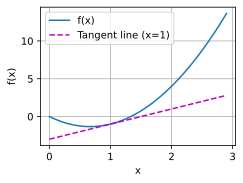

In [12]:
def use_svg_display():  # @save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')


def set_figsize(figsize=(3.5, 2.5)):  # @save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize
# @save


def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()
# @save


def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)


x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])


In [16]:
import torch
x=torch.arange(4.0)
print(x)

tensor([0., 1., 2., 3.])


In [17]:
x.requires_grad_(True)
x.grad

In [18]:
y=2*torch.dot(x,x)
print(y)

tensor(28., grad_fn=<MulBackward0>)


In [19]:
print(y.backward())
print(x.grad)

None
tensor([ 0.,  4.,  8., 12.])


In [20]:
x.grad==4*x

tensor([True, True, True, True])

In [21]:
print(x.grad)
x.grad.zero_()
y=x.sum()
y.backward()
print(x.grad)

tensor([ 0.,  4.,  8., 12.])
tensor([1., 1., 1., 1.])


In [22]:
print(y)

tensor(6., grad_fn=<SumBackward0>)


In [23]:
x.grad.zero_()
y=x*x
u=y.detach()
z=u*x
z.sum().backward()
x.grad==u

tensor([True, True, True, True])

In [25]:
print(z)
print(z.sum())

tensor([ 0.,  1.,  8., 27.], grad_fn=<MulBackward0>)
tensor(36., grad_fn=<SumBackward0>)


In [27]:
print(u)
print(x)

tensor([0., 1., 4., 9.])
tensor([0., 1., 2., 3.], requires_grad=True)


In [4]:
import torch
x=torch.arange(4.0)
y=x*x
print(y.sum())
z=torch.dot(x,x)
print(z)
z==y.sum()


tensor(14.)
tensor(14.)


tensor(True)

In [9]:
a=torch.ones((2,5,4))
print(a)
print(a.shape)
print(a.sum(axis=1))
print(a.sum(axis=1).shape)
print(a.sum(axis=1,keepdims=True))
print(a.sum(axis=1, keepdims=True).shape)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])
torch.Size([2, 5, 4])
tensor([[5., 5., 5., 5.],
        [5., 5., 5., 5.]])
torch.Size([2, 4])
tensor([[[5., 5., 5., 5.]],

        [[5., 5., 5., 5.]]])
torch.Size([2, 1, 4])


In [10]:
%matplotlib inline
import torch
import math
import time
import numpy as np
from d2l import torch as d2l

In [12]:
n=1000
a=torch.ones([n])
b=torch.ones([n])
print(a.shape)
print(b.shape)

torch.Size([1000])
torch.Size([1000])


In [19]:
class Timer: #@save
    def __init__(self):
        self.time=[]
        self.start()
    def start(self):
        self.tik=time.time()
    def stop(self):
        self.time.append(time.time()-self.tik)
        return self.time[-1]
    def avg(self):
        return sum(self.times)/len(self.times)
    def sum(self):
        return sum(self.times)
    def cumsum(self):
        return np.array(self.times).cumsum().tolist()

In [20]:
c=torch.zeros(n)
timer=Timer()
for i in range(n):
    c[i]=a[i]+b[i]
print(f"{timer.stop():.5f}sec")

0.00997sec


In [21]:
timer.start()
d=a+b
print(f"{timer.stop():.5f}sec")

0.00000sec


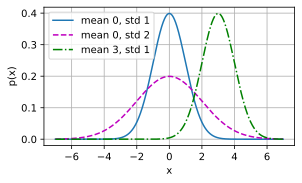

In [22]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)


# 再次使用numpy进行可视化
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])
